In [1]:
import sys
!{sys.executable} -m pip install python-dotenv

In [2]:
!{sys.executable} -m pip install entsoe-py

In [22]:
!{sys.executable} -m pip install lxml

     |████████████████████████████████| 6.9 MB 12.4 MB/s eta 0:00:01


In [3]:
from dotenv import dotenv_values
from entsoe import EntsoePandasClient

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
config = dotenv_values("../.env")

In [5]:
entsoe_members = pd.read_csv("../data/misc/entsoe_member_countries.csv")

In [6]:
client = EntsoePandasClient(api_key=config["entsoe_key"])

start = pd.Timestamp("20210701", tz="UTC")
end = pd.Timestamp("20211001", tz="UTC")
country_code = "AT"

sample_data = client.query_day_ahead_prices(country_code, start=start, end=end)

In [7]:
sample_data_ch = client.query_day_ahead_prices("CH", start=start, end=end)

In [8]:
sample_data_pt = client.query_day_ahead_prices("PT", start=start, end=end)

In [9]:
df = pd.DataFrame({"at": sample_data, "ch": sample_data_ch, "pt": sample_data_pt})
df

,at,ch,pt
2021-07-01 00:00:00+00:00,73.73,73.78,91.26
2021-07-01 01:00:00+00:00,72.01,72.71,91.65
2021-07-01 02:00:00+00:00,71.24,72.06,91.99
2021-07-01 03:00:00+00:00,73.96,74.34,91.99
2021-07-01 04:00:00+00:00,84.91,88.55,92.34
...,...,...,...
2021-09-30 20:00:00+00:00,180.02,173.90,211.85
2021-09-30 21:00:00+00:00,163.75,167.58,204.87
2021-09-30 22:00:00+00:00,121.87,158.37,223.42
2021-09-30 23:00:00+00:00,88.46,162.60,220.12


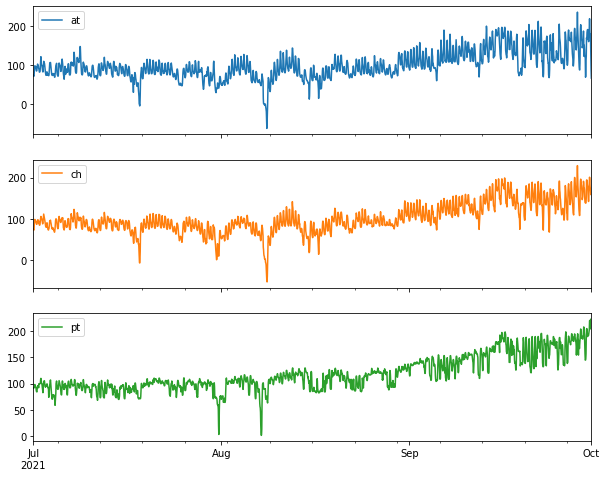

In [12]:
df.plot(subplots=True, figsize=(10, 8))
plt.show()

In [13]:
def collect_series_for_countries(countries, client, start, end):
    serieses = dict()
    for country_code in set(countries):
        try:
            serieses[country_code] = client.query_day_ahead_prices(country_code, start=start, end=end)
        except Exception:
            pass
    
    return pd.DataFrame(serieses)

In [14]:
multi_sample = collect_series_for_countries(entsoe_members["code"].values, client, start, end)
multi_sample.head()

,EE,AT,HR,BG,FI,CZ,RS,FR,PT,SK,...,BE,RO,GR,PL,ES,SI,LV,NL,LT,HU
2021-07-01 00:00:00+00:00,71.96,73.73,80.10,127.09,35.90,73.73,75.44,73.73,91.26,73.73,...,73.73,73.73,82.08,73.73,91.26,80.10,71.96,73.73,71.96,73.73
2021-07-01 01:00:00+00:00,70.28,72.01,80.10,127.09,35.30,72.01,74.03,72.01,91.65,72.01,...,72.01,72.01,79.47,72.01,91.65,80.10,70.28,72.01,70.28,72.01
2021-07-01 02:00:00+00:00,36.05,71.24,79.78,127.10,36.05,71.24,74.06,71.24,91.99,71.24,...,71.24,71.24,73.26,71.24,91.99,79.78,69.53,71.24,69.53,71.24
2021-07-01 03:00:00+00:00,72.18,73.96,80.10,143.42,51.10,73.96,75.29,73.96,91.99,73.96,...,73.96,73.96,79.47,73.96,91.99,80.10,72.18,73.96,72.18,73.96
2021-07-01 04:00:00+00:00,84.91,84.91,95.48,160.54,84.91,84.91,85.87,84.91,92.34,84.91,...,84.91,84.91,82.08,82.48,92.34,95.48,84.91,84.91,84.91,84.91


In [17]:
# The exchange rate of a Euro has been rather stable at 1.9558 Bulgarian Lev from 2005 on
multi_sample["BG"] = multi_sample["BG"] / 1.9558

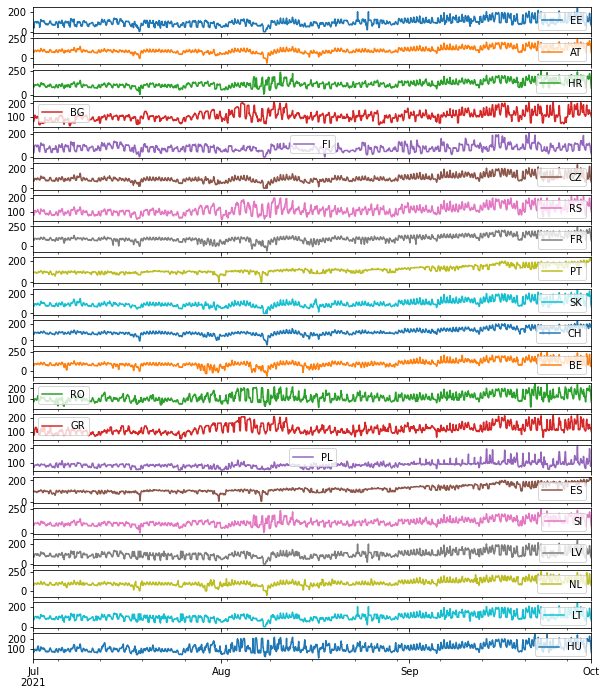

In [18]:
multi_sample.plot(subplots=True, figsize=(10,12))
plt.show()

In [19]:
aoi_start = pd.Timestamp("20190101", tz="UTC")
aoi_end = pd.Timestamp("20220101", tz="UTC")

aoi_df = collect_series_for_countries(entsoe_members["code"].values, client, aoi_start, aoi_end)
aoi_df.head()

Connection Error, retrying in 0 seconds


,EE,AT,HR,BG,FI,CZ,RS,FR,PT,SK,...,BE,RO,GR,PL,ES,SI,LV,NL,LT,HU
2019-01-01 00:00:00+00:00,10.07,39.76,46.27,47.92,10.07,3.97,51.08,46.27,66.88,3.97,...,66.58,245.54,67.87,43.16,66.88,46.27,10.07,64.98,10.07,52.71
2019-01-01 01:00:00+00:00,10.03,39.78,39.78,47.10,10.03,4.70,34.03,39.78,66.00,4.70,...,65.07,169.98,68.02,43.11,66.00,39.78,10.03,60.27,10.03,36.49
2019-01-01 02:00:00+00:00,4.56,27.87,27.87,47.06,4.56,0.93,28.49,27.87,63.64,0.93,...,52.17,145.52,70.00,33.54,63.64,27.87,4.56,49.97,4.56,31.24
2019-01-01 03:00:00+00:00,4.83,-0.36,-0.36,44.08,4.83,3.90,26.95,23.21,58.85,3.90,...,47.66,121.00,70.00,29.84,58.85,-0.36,4.83,47.66,4.83,25.98
2019-01-01 04:00:00+00:00,8.09,-4.45,-4.45,47.02,8.09,7.95,30.90,22.64,55.47,7.95,...,50.87,124.33,64.83,34.65,55.47,-4.45,8.09,48.00,8.09,26.69


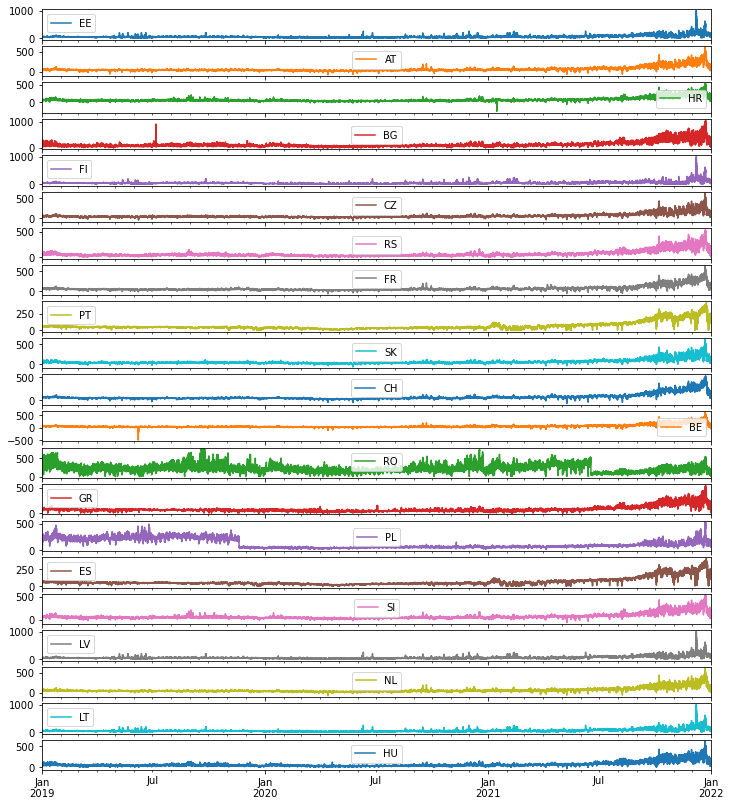

In [20]:
aoi_df.plot(subplots=True, figsize=(12,14))
plt.show()

In [36]:
# day ahead prices for Romania on ENTSOE platform switched from RON to EUR at 2021-06-17T22:00:00
ron_eur_exchange = pd.read_xml("../data/misc/ron.xml")
ron_eur_exchange.head()

,TIME_PERIOD,OBS_VALUE,OBS_STATUS,OBS_CONF
0,2005-07-01,3.6030,A,F
1,2005-07-04,3.6009,A,F
2,2005-07-05,3.5963,A,F
3,2005-07-06,3.5995,A,F
4,2005-07-07,3.5904,A,F


In [41]:
ron_eur_exchange["TIME_PERIOD"] = pd.to_datetime(ron_eur_exchange["TIME_PERIOD"])
ron_eur_exchange = ron_eur_exchange.set_index("TIME_PERIOD")
ron_eur_exchange.head()

,OBS_VALUE,OBS_STATUS,OBS_CONF
TIME_PERIOD,,,
2005-07-01,3.6030,A,F
2005-07-04,3.6009,A,F
2005-07-05,3.5963,A,F
2005-07-06,3.5995,A,F
2005-07-07,3.5904,A,F


In [43]:
ron_eur_exchange = ron_eur_exchange.drop(columns=["OBS_STATUS", "OBS_CONF"])
ron_eur_exchange.head()

,OBS_VALUE
TIME_PERIOD,
2005-07-01,3.6030
2005-07-04,3.6009
2005-07-05,3.5963
2005-07-06,3.5995
2005-07-07,3.5904


In [63]:
ron_eur_exchange = ron_eur_exchange.asfreq('d').bfill()
ron_eur_exchange.head()

,OBS_VALUE
TIME_PERIOD,
2005-07-01,3.6030
2005-07-02,3.6009
2005-07-03,3.6009
2005-07-04,3.6009
2005-07-05,3.5963


In [80]:
ron_eur_exchange_res = ron_eur_exchange.loc["2019-01-01":"2021-06-18"].resample("H").pad().loc[:"2021-06-17T21:00:00"]
ron_eur_exchange_res.head()

,OBS_VALUE
TIME_PERIOD,
2019-01-01 00:00:00,4.66
2019-01-01 01:00:00,4.66
2019-01-01 02:00:00,4.66
2019-01-01 03:00:00,4.66
2019-01-01 04:00:00,4.66


In [90]:
# bring the whole Romania time series to EUR based on the European Central Bank exchange time series
aoi_df.loc[aoi_df.index.to_series().between("2019-01-01", "2021-06-17T21:00:00"), "RO"] = aoi_df["RO"].loc["2019-01-01":"2021-06-17T21:00:00"].div(ron_eur_exchange_res["OBS_VALUE"].values)

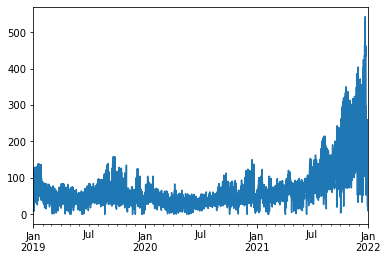

In [91]:
aoi_df["RO"].plot()
plt.show()

In [92]:
# recalculate the Bulgarian time series with the very stable EUR/BGN exchange
aoi_df["BG"] = aoi_df["BG"] / 1.9558

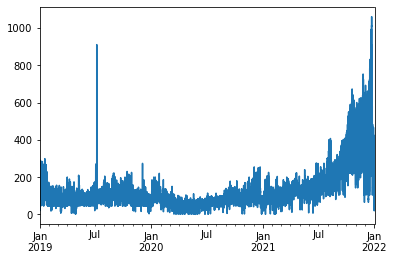

In [94]:
aoi_df["BG"].plot()
plt.show()

In [108]:
# day ahead prices for Poland on ENTSOE platform switched from PLN to EUR at 2019-11-20T23:00
pln_eur_exchange = pd.read_xml("../data/misc/pln.xml")
pln_eur_exchange["TIME_PERIOD"] = pd.to_datetime(pln_eur_exchange["TIME_PERIOD"])
pln_eur_exchange = pln_eur_exchange.set_index("TIME_PERIOD")
pln_eur_exchange = pln_eur_exchange.drop(columns=["OBS_STATUS", "OBS_CONF"])
pln_eur_exchange = pln_eur_exchange.asfreq('d').bfill()
pln_eur_exchange_res = pln_eur_exchange.loc["2019-01-01":"2019-11-20"].resample("H").pad().loc[:"2019-11-19T22:00"]
pln_eur_exchange_res.head()

,OBS_VALUE
TIME_PERIOD,
2019-01-01 00:00:00,4.2964
2019-01-01 01:00:00,4.2964
2019-01-01 02:00:00,4.2964
2019-01-01 03:00:00,4.2964
2019-01-01 04:00:00,4.2964


In [104]:
aoi_df["PL"].loc["2019-01-01":"2019-11-19T22:00"]

2019-01-01 00:00:00+00:00     43.16
2019-01-01 01:00:00+00:00     43.11
2019-01-01 02:00:00+00:00     33.54
2019-01-01 03:00:00+00:00     29.84
2019-01-01 04:00:00+00:00     34.65
                              ...  
2019-11-19 18:00:00+00:00    246.75
2019-11-19 19:00:00+00:00    247.06
2019-11-19 20:00:00+00:00    226.59
2019-11-19 21:00:00+00:00    208.67
2019-11-19 22:00:00+00:00    193.29
Freq: H, Name: PL, Length: 7751, dtype: float64

In [109]:
# bring the whole Polish time series to EUR based on the European Central Bank exchange time series
aoi_df.loc[aoi_df.index.to_series().between("2019-01-01", "2019-11-19T22:00"), "PL"] = aoi_df["PL"].loc["2019-01-01":"2019-11-19T22:00"].div(pln_eur_exchange_res["OBS_VALUE"].values)

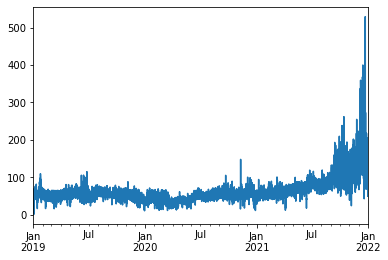

In [110]:
aoi_df["PL"].plot()
plt.show()

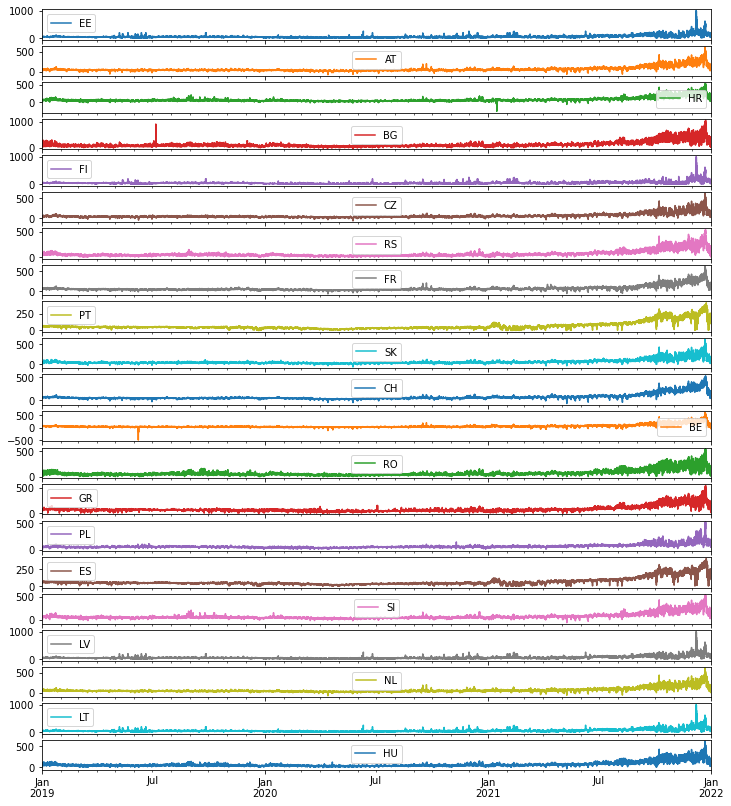

In [111]:
aoi_df.plot(subplots=True, figsize=(12,14))
plt.show()

In [ ]:
aoi_df.to_csv("../data/entsoe/day_ahead_2019_2021.csv", index=True, index_label="TimeStamp")